# ST590 - Project 2

Authored by Group 13 - Dave Bergeron, Xavier Genelin, and Maksim Nikiforov

---
Placeholder cell for work in progress

Relevant links:
- [The Netflix Tech Blog (browse for relevant posts)](https://netflixtechblog.com/)
- [Evolution of the Netflix Data Pipeline](https://netflixtechblog.com/evolution-of-the-netflix-data-pipeline-da246ca36905)
- [Rapid Event Notification System at Netflix](https://netflixtechblog.com/rapid-event-notification-system-at-netflix-6deb1d2b57d1)
- [Notebooks at Netflix: From analytics to engineering (sponsored by Netflix) - Michelle Ufford (Netflix) Kyle Kelley (Netflix)](https://learning.oreilly.com/videos/jupytercon-new-york/9781492025818/9781492025818-video322538/)
- [Petabytes Scale Analytics Infrastructure @Netflix](https://www.infoq.com/presentations/netflix-big-data-infrastructure/)
---

## Introduction

Netflix is "one of the world's leading entertainment services", providing access to TV series, movies, documentaries, and mobile games to over 200 million subscribers <cite id="fmf8k"><a href="#zotero|6578788/FQ5QA3NL">(<i>Netflix - Overview - Profile</i>, n.d.)</a></cite>. Within the company, "[d]ata is used to inform a wide range of questions — ‘How can we make the product experience even better?’, ‘Which shows and films bring the most joy to our members?’, ‘Who can we partner with to expand access to our service in new markets?’ <cite id="3ezti"><a href="#zotero|6578788/IPJC2YZY">(Jackman &#38; Reddy, 2020)</a></cite>. The company's data scientists, engineers, analysts, and visualizers regularly interact with internal business verticals - product, content, membership, studio, marketing, and platform - to analyze viewership patterns, estimate the sizes of target audiences for content, and invest accordingly in that content <cite id="4ys1u"><a href="#zotero|6578788/QUNPSV7I">(Ufford &#38; Kelley, 2018)</a></cite>. They work on optimization problems to determine where to cache content to remain "as close as possible to the end user and consequently to send as few bytes as possible across the wider internet" <cite id="h21l8"><a href="#zotero|6578788/X3RK3LMK">(Berglund, 2017)</a></cite>. Data teams are also critical to providing a near real-time and consistent user experience <cite id="rj71k"><a href="#zotero|6578788/S5MM5FDD">(Gulati &#38; Gevorkyan, 2022)</a></cite>, continuously delivering incremental changes <cite id="srtxk"><a href="#zotero|6578788/JMNSJ7WZ">(<i>Morgan Stanley Technology, Media &#38; Telecom Conference</i>, 2022)</a></cite>, and quickly troubleshooting problems <cite id="hkegq"><a href="#zotero|6578788/L2QBMLX2">(Srivastava &#38; Mayworm, 2022)</a></cite>. They do this at mind-boggling scale; in 2018, Netflix was ingesting more than 1 trillion streaming events _per day_ and filtering it into a data warehouse that contained over 100 petabytes of data  <cite id="pikae"><a href="#zotero|6578788/QUNPSV7I">(Ufford &#38; Kelley, 2018)</a></cite>. The sections below discuss challenges that result from data of this size and the technical architecture that keeps Netflix operational.       

<div style="width:image width px; 
            font-size:80%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:0.5em;  
            border-style: solid; border-color: rgba(211, 211, 211, 0.1);
            background-color: rgb(255, 255, 255);">
    <img src="images/1_Pm_2Ai349Qh0W-caNQ9agQ.png" 
         alt="Responsibilities of data analysts, engineers, and visualizers at Netflix" 
         width=400 
         style="padding-bottom:0.5em;"/>
    <div style="padding: 3px; 
                width: 400px; 
                word-wrap: break-word; 
                text-align:center;">
        Responsibilities of data professionals at Netflix. <br> 
        <a href="https://netflixtechblog.com/analytics-at-netflix-who-we-are-and-what-we-do-7d9c08fe6965" 
           style="float: right;"> 
           Image Source 
        </a>
    </div>
</div>

## Data ingestion

According to Michelle Ufford, who led the Big Data Tools team at Netflix, Netflix continuously tracks user activity. "As soon as you log in...we're tracking what is the content that we are showing you, because every single member, and every single profile, is completely 100% personalized" <cite id="lu6h5"><a href="#zotero|6578788/QUNPSV7I">(Ufford &#38; Kelley, 2018)</a></cite>. Events such as playing video, pausing video, quality changes, and content switching are streamed continuously to Netflix, and ingestion systems must handle "spikes due to a popular show coming online or unexpected failure scenarios" <cite id="8hvwm"><a href="#zotero|6578788/USR3CK7T">(Xu, 2018)</a></cite>. When systems do fail, they must recover quickly and automatically or re-route traffic to servers in other clusters. 

To accept and process streaming data, Netflix implemented an ingestion platform called "Keystone" using Apache Kafka and Apache Flink <cite id="vwd4k"><a href="#zotero|6578788/USR3CK7T">(Xu, 2018)</a></cite>. As a distributed event-streaming platform, Kafka can capture incoming data from a multitude of sensors, mobile devices, and software applications and store it durably as event logs (or "topics") <cite id="z2ufe"><a href="#zotero|6578788/KM2X2AE5">(<i>Apache Kafka</i>, n.d.)</a></cite>. Flink, a distributed in-memory processing engine, can consume Kafka's topics as input for ETL (extract, transform, load) pipelines to aggregate and enrich streaming data with SQL, Java, Scala, or Python <cite id="uzdvv"><a href="#zotero|6578788/AZYUGXBD">(<i>Data Pipelines &#38; ETL</i>, n.d.)</a></cite>. Recently, Netflix has incroporated both platforms into an auto-diagnosis and remediation system called _Pensive_ <cite id="w1msp"><a href="#zotero|6578788/L2QBMLX2">(Srivastava &#38; Mayworm, 2022)</a></cite>. Pensive can monitor metrics to diagnose errors, automatically deploy new Flink clusters, increase and decrease the retention size of Kafka topics, or alert engineers about ongoing problems. In the future, the owners of Pensive hope to augment the platform's business rules engine with additional machine learning capabilities to classify a greater number of errors and to help tune Apache Spark clusters.         

<div style="width:image width px; 
            font-size:80%; 
            text-align:center; 
            float: left; padding-left-right-top-bottom:0.5em;  
            border-style: solid; border-color: rgba(211, 211, 211, 0.1);
            background-color: rgb(255, 255, 255);">
    <img src="images/1_Qw07CY3mlmfcI70UFZv0GQ.jpeg" 
         alt="Pensive, an auto-diagnosis and remediation system for data platforms at Netflix" 
         width=400 
         style="padding-bottom:0.5em;"/>
    <div style="padding: 3px; 
                width: 400px; 
                word-wrap: break-word; 
                text-align:center;">
        The streaming architecture of Pensive, an auto-diagnosis and remediation system for data platforms at Netflix. <br> 
        <a href="https://netflixtechblog.com/auto-diagnosis-and-remediation-in-netflix-data-platform-5bcc52d853d1" 
           style="float: right;"> 
           Image Source 
        </a>
    </div>
</div>

# Data storage and analysis

# Data visualization

Data visualization at Netflix is "the end-to-end process of finding and processing raw data, weaving in analytics and business insights, and finally visually telling a story tailored to the audience" <cite id="8xmb3"><a href="#zotero|6578788/DTC2ECQF">(Zhu, 2018)</a></cite>. Netflix uses a wide range of data visualization tools such as Tableau, Power BI, and Looker while also creating their own from scratch that some of those different tools may not offer though something like JavaScript web apps <cite id="aohir"><a href="#zotero|6578788/IPJC2YZY">(Jackman &#38; Reddy, 2020)</a></cite>. With the vast amount of data available at Netflix and the constant usage from their users, they need to make informed decisions on what is happening currently. The dashboards have dynamic visuals that use the most recent data possible with some being updated in near real-time <cite id="t7jcp"><a href="#zotero|6578788/VS6ZHSEW">(Mavinkurve et al., 2017)</a></cite>. The image below is an example of a visual that Netflix would use that uses real-time data by using fake data.

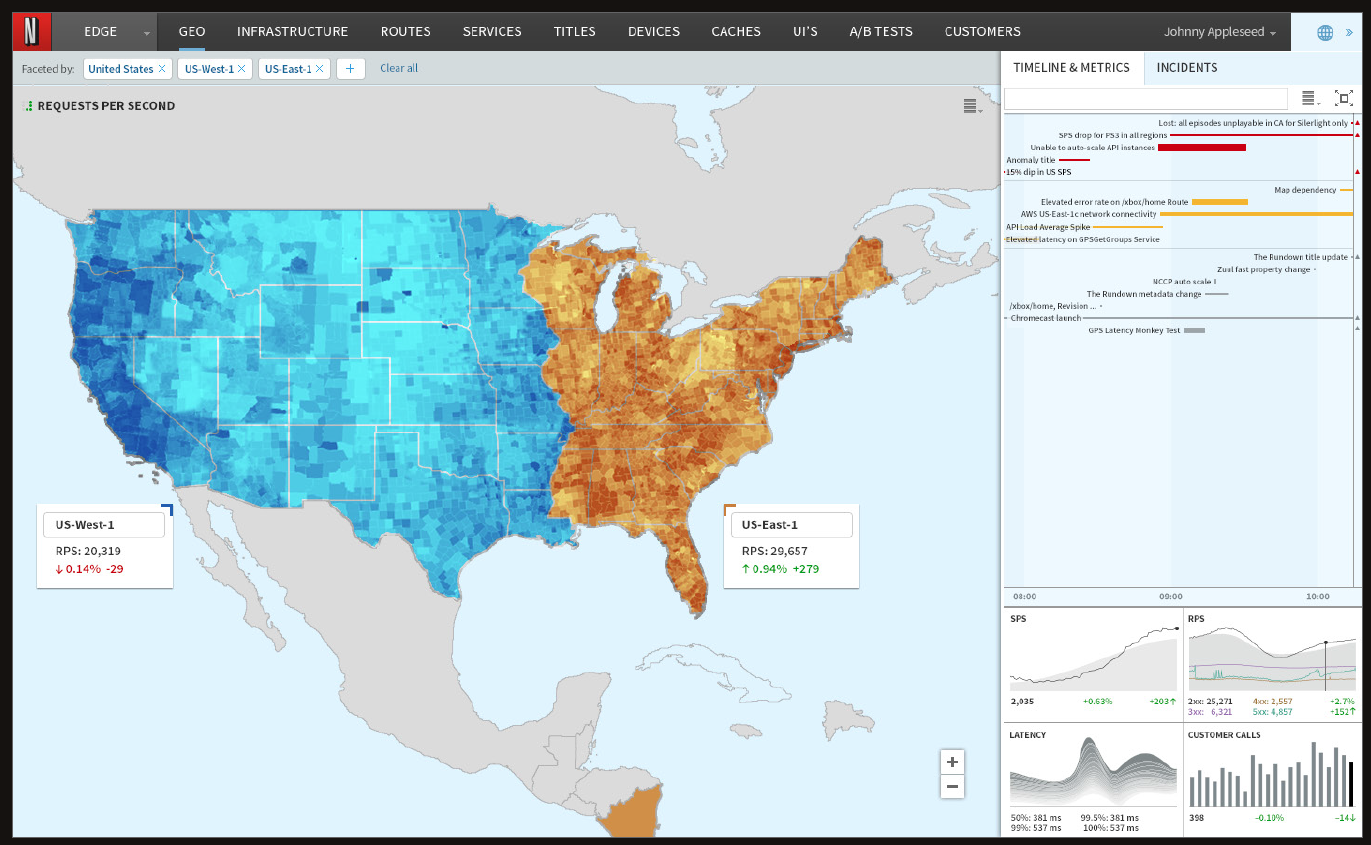

The dashboard will have different components that allows the user to adjust the visual to what they are interested in seeing, along with a navigation bar to allow a variety of pages to be located in one place. In the example above, the visual provides a user real-time information about incidents users are having with the service. This can allow the business to easily monitor daily activities in real-time <cite id="uvb7x"><a href="#zotero|6578788/VNFYVJ5J">(Penamatsa, n.d.)</a></cite>.

Netflix uses data visualization to monitor user activity which can also can help aide the company in what type of shows to create while also seeing which current series they should extend based on what users are actually watching. This strategy has made Netflix renew over 80% of their seasons, compared to the average 25% in the industry <cite id="zs9hb"><a href="#zotero|6578788/VNFYVJ5J">(Penamatsa, n.d.)</a></cite>. By looking at what users are viewing, Netflix is also able to target different audiences with TV and movie trailers. Netflix produced 10 different trailers for the first season of the show House of Cards, and showed the trailers to different audiences. This was different than their usual strategy of only creating one or two trailers for promotion <cite id="aw4jw"><a href="#zotero|6578788/SXNLEYEC">(Divakaran, 2017)</a></cite>. For example, if an audience was a fan of Kevin Spacy (the show's main protagonist) they would see a trailer that he was the main focus of while another audience may prefer shows/movies with female protagonists, so they would be shown a trainer that showcased the female characters in the show 

## Bibliography

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|6578788/KM2X2AE5"></i><i>Apache Kafka</i>. (n.d.). Apache Kafka. Retrieved March 11, 2022, from https://kafka.apache.org/documentation/#intro_concepts_and_terms</div>
  <div class="csl-entry"><i id="zotero|6578788/X3RK3LMK"></i>Berglund, A. (2017, May 25). <i>How Data Science Helps Power Worldwide Delivery of Netflix Content</i>. Medium. https://netflixtechblog.com/how-data-science-helps-power-worldwide-delivery-of-netflix-content-bac55800f9a7</div>
  <div class="csl-entry"><i id="zotero|6578788/AZYUGXBD"></i><i>Data Pipelines &#38; ETL</i>. (n.d.). Retrieved March 11, 2022, from //nightlies.apache.org/flink/flink-docs-master/docs/learn-flink/etl/</div>
  <div class="csl-entry"><i id="zotero|6578788/SXNLEYEC"></i>Divakaran, S. (2017, August 13). <i>Inside Netflix’s Content Strategy</i>. Digital Uncovered. https://digitaluncovered.com/inside-netflixs-content-strategy/</div>
  <div class="csl-entry"><i id="zotero|6578788/S5MM5FDD"></i>Gulati, A., &#38; Gevorkyan, D. (2022, February 18). <i>Rapid Event Notification System at Netflix</i>. Medium. https://netflixtechblog.com/rapid-event-notification-system-at-netflix-6deb1d2b57d1</div>
  <div class="csl-entry"><i id="zotero|6578788/IPJC2YZY"></i>Jackman, M., &#38; Reddy, M. (2020, December 18). <i>Analytics at Netflix: Who we are and what we do</i>. Netflix Technology Blog. https://netflixtechblog.com/analytics-at-netflix-who-we-are-and-what-we-do-7d9c08fe6965</div>
  <div class="csl-entry"><i id="zotero|6578788/VS6ZHSEW"></i>Mavinkurve, R., Becker, J., &#38; Christensen, B. (2017, April 19). <i>Improving Netflix’s Operational Visibility with Real-Time Insight Tools</i>. Medium. https://netflixtechblog.com/improving-netflixs-operational-visibility-with-real-time-insight-tools-ab5e7af062e5</div>
  <div class="csl-entry"><i id="zotero|6578788/JMNSJ7WZ"></i><i>Morgan Stanley Technology, Media &#38; Telecom Conference</i>. (2022, March 8). Investor Events. https://morganstanley.webcasts.com/viewer/event.jsp?ei=1534749&#38;tp_key=67fe6fb0ba</div>
  <div class="csl-entry"><i id="zotero|6578788/FQ5QA3NL"></i><i>Netflix - Overview - Profile</i>. (n.d.). Retrieved March 11, 2022, from https://ir.netflix.net/ir-overview/profile/default.aspx</div>
  <div class="csl-entry"><i id="zotero|6578788/VNFYVJ5J"></i>Penamatsa, V. (n.d.). <i>Data visualization, the key to Netflix’s success: an analysis</i>. Retrieved March 16, 2022, from https://www.toucantoco.com/en/blog/data-visualization-the-key-to-netflixs-success-an-analysis</div>
  <div class="csl-entry"><i id="zotero|6578788/L2QBMLX2"></i>Srivastava, V., &#38; Mayworm, M. (2022, January 20). <i>Auto-Diagnosis and Remediation in Netflix Data Platform</i>. Medium. https://netflixtechblog.com/auto-diagnosis-and-remediation-in-netflix-data-platform-5bcc52d853d1</div>
  <div class="csl-entry"><i id="zotero|6578788/QUNPSV7I"></i>Ufford, M., &#38; Kelley, K. (2018). <i>Notebooks at Netflix: From analytics to engineering (sponsored by Netflix) - Michelle Ufford (Netflix) Kyle Kelley (Netflix)</i>. O’Reilly Online Learning. https://learning.oreilly.com/videos/jupytercon-new-york/9781492025818/9781492025818-video322538/</div>
  <div class="csl-entry"><i id="zotero|6578788/USR3CK7T"></i>Xu, Z. (2018, September 10). <i>Keystone Real-time Stream Processing Platform</i>. Medium. https://netflixtechblog.com/keystone-real-time-stream-processing-platform-a3ee651812a</div>
  <div class="csl-entry"><i id="zotero|6578788/DTC2ECQF"></i>Zhu, H. (2018, August 3). <i>Day In The Life Of A Data Visualization Engineer @ Netflix</i>. Medium. https://medium.com/hasbrain/day-in-life-of-a-data-visualization-engineer-netflix-d99150e8275c</div>
</div>
<!-- BIBLIOGRAPHY END -->